# **Ensemble method, voting system**

this small project shows how voting system improve acc

In [0]:
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image

import scipy.stats


In [0]:

n_samples=10000
acc=0.7
norm_mean =0.55

N=[1,3,5,11,21,51]

n_case = len(N)
np.random.seed(0)

def cal_norm_std(acc, mean):
  x=scipy.stats.norm.ppf(1-acc,mean,1)
  return (mean-0.5)/(mean-x)

std = cal_norm_std(acc,norm_mean)

In [0]:
# generate a correct prediction distribution. 
# correct_prob = predict_prob when label=1 (TP); correct_prob = 1 - predict_prob when label=0 (TF)
# for correctness = 1,0 threshold = 0.5 of correct_prob
# the functions return an array simulating mapping the correctness of the model prediction of each sample

def pred_sim(n_samples, mean, std):
    gen=np.random.normal(mean, std, n_samples)
    return 1.*(gen>0.5)    # output 1 or 0

def pred_sim_soft(n_samples, mean, std):
    return np.random.normal(mean, std, n_samples)   # otuput correct_prob



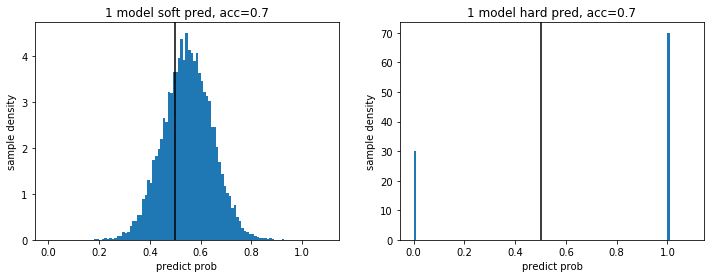

In [0]:
bins=np.arange(0,1.1,0.01)
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.hist(pred_sim_soft(n_samples,norm_mean, std),bins=bins,density=True)
plt.xlabel('correctness prob')
plt.ylabel('sample density')
plt.axvline(x=0.5,color='k')
plt.title('1 model soft pred, acc=' + str(acc))


plt.subplot(1,2,2)
plt.hist(pred_sim(n_samples, norm_mean, std),bins=bins,density=True)
plt.xlabel('correctness prob')
plt.ylabel('sample density')
plt.axvline(x=0.5,color='k')
plt.title('1 model hard pred, acc=' + str(acc))

plt.show()

In TP case, correct_prob = pred_prob > 0.5

In TN case, correct_prob = (1 - pred_prob) > 0.5

so the correct_prob > 0.5 represent a correctly predict sample.

in the prob output left figure, 70% of the prediction popluation are > 0.5, therefore acc=0.7

in the binary output right figure, 70% of the population is equal to 1, predicted correctly.

## **Soft voting**



In [0]:
# soft voting
j=0
vote=[]
vote_acc=np.ones(n_case)
for n_models in N:
  ens = np.zeros(n_samples)

  for i in range(n_models):
    ens = ens + pred_sim_soft(n_samples, norm_mean,std)

  ens=ens/n_models
  vote.append(ens)
  vote_acc[j]=np.mean(1*(ens>=0.5))
  j+=1

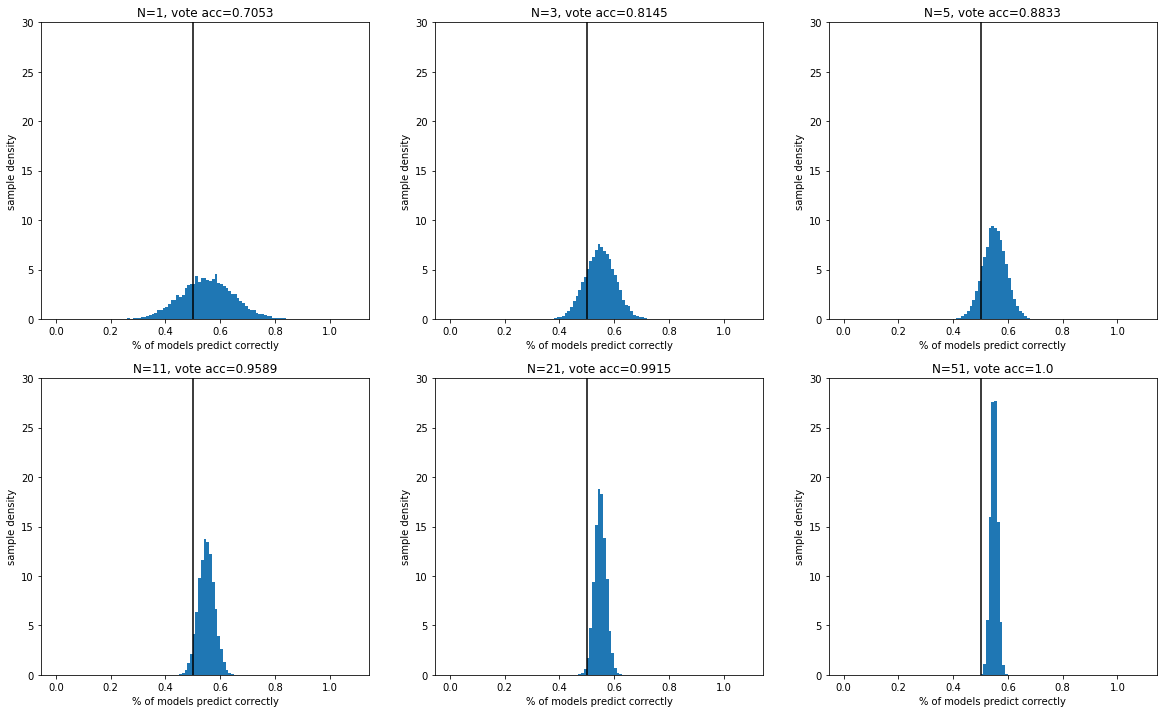

In [0]:
bins=np.arange(0,1.1,0.01)

plt.figure(figsize=(20,12))

for i in range(n_case):
  plt.subplot((n_case-1)//3+1,3,i+1)
  plt.hist(vote[i],label=None,bins=bins,density=True)
  plt.xlabel('mean of correct prob)
  plt.ylabel('sample density')
  plt.ylim(0,30)
  plt.axvline(x=0.5,color='k')
  plt.title('N=' + str(N[i]) + ', vote acc=' + str(vote_acc[i]))

plt.show()

soft voting takes the mean of correct_prob. the mean of correct_prob is taken as the correct_prob of the voting system. Histograms show that more population shift to > 0.5 domain while more models are used. This indicates the increasing of acc.

## **Hard voting**



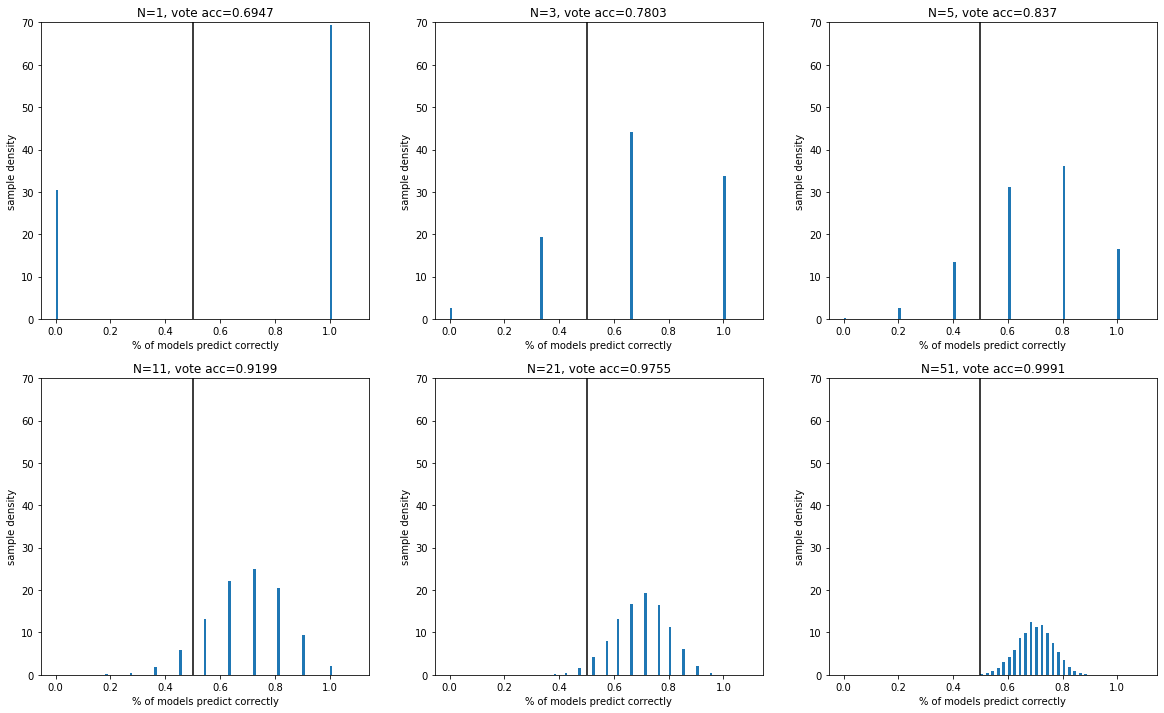

In [0]:
# hard voting
j=0
vote=[]
vote_acc=np.ones(n_case)
for n_models in N:
  ens = np.zeros(n_samples)

  for i in range(n_models):
    ens = ens + pred_sim(n_samples, norm_mean,std)

  ens=ens/n_models
  vote.append(ens)
  vote_acc[j]=np.mean(1*(ens>=0.5))
  j+=1

bins=np.arange(0,1.1,0.01)

plt.figure(figsize=(20,12))

for i in range(n_case):
  plt.subplot((n_case-1)//3+1,3,i+1)
  plt.hist(vote[i],label=None,bins=bins,density=True)
  plt.xlabel('% of models predict correctly')
  plt.ylabel('sample density')
  plt.ylim(0,70)
  plt.axvline(x=0.5,color='k')
  plt.title('N=' + str(N[i]) + ', vote acc=' + str(vote_acc[i]))

plt.show()

Hard voting takes the mean of binary correct_prob (0 or 1). the mean of binary correct_prob is also represent the % of models predict correctly. 

While > 0.5, it means that the correct predictions are the marjority. the hard voting system takes the marjority prediction therefore the correct one. 

Histograms show that more discrete bars and population shift to > 0.5 domain while more models are used. This indicates the increasing of acc.




# **References**






